In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from joblib import load
import numpy as np

mnist = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/mnist_dataset_784_v1.joblib")
X,y = mnist["data"],mnist["target"]
X = np.array(X)
y = np.array(y.astype(np.uint8))

In [3]:
np.shape(X)

(70000, 784)

In [10]:
X_trainf, X_test, y_trainf, y_test = X[:50000] / 255., X[50000:] / 255., y[:50000],y[50000:]
X_train, y_train, X_valid, y_valid = X_trainf[5000:], y_trainf[5000:], X_trainf[:5000], y_trainf[:5000]

In [15]:
from tensorflow import keras
import tensorflow as tf
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1407/1407 [==============================] - 3s 2ms/step - loss: 1.4989 - accuracy: 0.6942 - val_loss: 3711.1211 - val_accuracy: 0.1100


Text(0, 0.5, 'Loss')

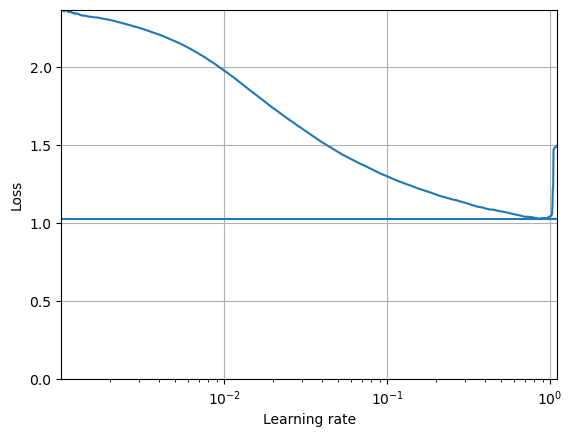

In [17]:
import matplotlib.pyplot as plt
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")


In [18]:
b_l_r = expon_lr.rates[expon_lr.losses.index(min(expon_lr.losses))] / 2
b_l_r

0.42623451352119446

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

import os                                             
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir          

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9203 - val_loss: 0.3496 - val_accuracy: 0.9030
Epoch 2/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1032 - accuracy: 0.9680 - val_loss: 0.0930 - val_accuracy: 0.9704
Epoch 3/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0691 - accuracy: 0.9786 - val_loss: 0.2041 - val_accuracy: 0.9446
Epoch 4/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9828 - val_loss: 0.0970 - val_accuracy: 0.9732
Epoch 5/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.2753 - val_accuracy: 0.9406
Epoch 6/100
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0313 - accuracy: 0.9891 - val_loss: 0.2094 - val_accuracy: 0.9550
Epoch 7/100
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0710 - val_ac

In [20]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.0760 - accuracy: 0.9805


[0.0759754329919815, 0.9805499911308289]